In [44]:
import math
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
from network import Network2
import matplotlib.pyplot as plt

# import sys 
# sys.path.append("../Training/")
# sys.path.append("../Training/models/")
# from data_loader import LoadPointsDataTest2
# import time 
# import copy 

In [45]:
model_dir = './checkpoints/ERShrub/0_10_ERShrub_unknown_network2_1028_3_4/model_100.pth'

start_fm = 0
stop_fm = 1
num_fm = 1
# file_cycles = [0, 20]

batch_size = 1944

num_encoder_layer = 3
num_decoder_layer = 4
latent_dim = 1028

interval = 1
step_size = 1

dim = 3
mode = "long"

# t_start = 1 * step_size * interval
# t_end = num_fm * step_size * interval

minval = -1
maxval = 1

In [46]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# model = torch.load(model_dirs)
model = Network2(dim, num_encoder_layer, num_decoder_layer, latent_dim)
model.load_state_dict(torch.load(model_dir))
model.to(device)
print("Model Loaded!")

0 3 192
1 192 385
2 385 771
0 1 64
1 64 128
2 128 257
0 1028 1028
1 1028 514
2 514 257
3 257 3
Model Loaded!


In [47]:
Dataset = torch.load('../data_generator/data_check.pth')
dataloader = DataLoader(Dataset, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=False)
print (len(Dataset))
print (len(dataloader.dataset))
print (len(dataloader))
# dataloader.dataset[600:1200][2]

1944
1944
1


In [48]:
results = np.zeros((num_fm * batch_size, dim))
for dd, data in enumerate(dataloader):
    
    print(dd)
    
    start = data[0].to(device)
    t = data[2].to(device)
    pred = model(start, t)
    
    # if dd % 20 == 0:
    #     print(start, t)
    
    pred_cpu = pred.detach().cpu().numpy()
    
    results[dd*batch_size : (dd+1) * batch_size,:] = pred_cpu
    
# fm[:, 0] = (fm[:, 0] - minval) / (maxval - minval) * (bounding[1] - bounding[0]) + bounding[0]
# fm[:, 1] = (fm[:, 1] - minval) / (maxval - minval) * (bounding[3] - bounding[2]) + bounding[2]
# fm[:, 2] = (fm[:, 2] - minval) / (maxval - minval) * (bounding[5] - bounding[4]) + bounding[4]

0


In [57]:
# b = data_train[:][0]
# a = b.numpy()

temp = Dataset[:][1]
end_true = temp.numpy()

# temp = Dataset[:][2]
# tt = temp.numpy()

Text(0.5, 0.92, 'Onestep predict')

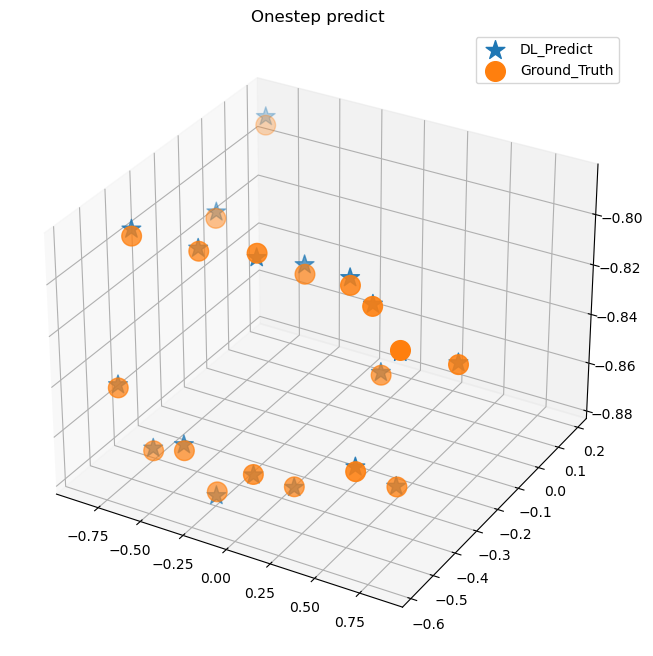

In [90]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ii =20
xline  = results[1:ii,0]
yline  = results[1:ii,1]
zline  = results[1:ii,2]

xline0 = end_true[1:ii,0]
yline0 = end_true[1:ii,1]
zline0 = end_true[1:ii,2]

# tdata  = tt[ii:6000:600]

# ax.plot3D(xline, yline, zline, 'red')
ax.scatter3D(xline, yline, zline, s = 200, marker = '*')
# ax.plot3D(xline0, yline0, zline0, 'blue')
ax.scatter3D(xline0, yline0, zline0, s = 200)
ax.legend(['DL_Predict','Ground_Truth'])
ax.set_title('Onestep predict')

# plt.subplot(2,2,1)
# plt.plot(results[:,0],end_true[:,0],'o')
# plt.subplot(2,2,2)
# plt.plot(results[:,1],end_true[:,1],'o')
# plt.subplot(2,2,3)
# plt.plot(results[:,2],end_true[:,2],'o',)